In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sn
import time
%matplotlib notebook
sn.set_style("ticks",sn.axes_style({'axes.grid': True}))

def distance(a,b):
    d = np.sqrt( (b[0]-a[0])**2 + (b[1]-a[1])**2 + (b[2]-a[2])**2 )
    return d

In [2]:
random = np.loadtxt('Gravitationally_Rigid_Intergalactic_Dimensions_10k_random.dat')
data = np.loadtxt('Gravitationally_Rigid_Intergalactic_Dimensions_10k_data.dat')

rt = random.transpose()
dt = data.transpose()

In [3]:
rxpts = np.linspace(np.round(min(rt[0])),np.round(max(rt[0])),5)
rypts = np.linspace(np.round(min(rt[1])),np.round(max(rt[1])),5)
rzpts = np.linspace(np.round(min(rt[2])),np.round(max(rt[2])),5)

dxpts = np.linspace(np.round(min(dt[0])),np.round(max(dt[0])),5)
dypts = np.linspace(np.round(min(dt[1])),np.round(max(dt[1])),5)
dzpts = np.linspace(np.round(min(dt[2])),np.round(max(dt[2])),5)

In [4]:
ddivs_master = {}

xwidth=dxpts[1]-dxpts[0]
ywidth=dypts[1]-dypts[0]
zwidth=dzpts[1]-dzpts[0]

x,y,z=dt[0],dt[1],dt[2]

ddivs = []

for a,i in enumerate(dxpts[0:4]):
    
    index_x0 = x>=i
    index_x1 = x< i+xwidth

    for b,j in enumerate(dypts[0:4]):
        
        index_y0 = y>=j
        index_y1 = y< j+ywidth
        
        for c,k in enumerate(dzpts[0:4]):
        
            index_z0 = z>=k
            index_z1 = z< k+zwidth
            
            index = index_x0*index_x1 * index_y0*index_y1 * index_z0*index_z1
            
            xsub = x[index]
            ysub = y[index]
            zsub = z[index]
            
            ddivs.append([xsub,ysub,zsub])

            key = "%02d%02d%02d" % (a,b,c)
            ddivs_master[key] = [xsub,ysub,zsub]

In [5]:
rdivs_master = {}

xwidth=rxpts[1]-rxpts[0]
ywidth=rypts[1]-rypts[0]
zwidth=rzpts[1]-rzpts[0]

x,y,z=rt[0],rt[1],rt[2]

rdivs = []

for a,i in enumerate(rxpts[0:4]):

    index_x0 = x>i
    index_x1 = x<= i+xwidth

    for b,j in enumerate(rypts[0:4]):

        index_y0 = y>j
        index_y1 = y<= j+ywidth
        
        for c,k in enumerate(rzpts[0:4]):
                  
            index_z0 = z>k
            index_z1 = z<= k+zwidth
            
            index = index_x0*index_x1 * index_y0*index_y1 * index_z0*index_z1
            
            xsub = x[index]
            ysub = y[index]
            zsub = z[index]
            
            rdivs.append([xsub,ysub,zsub])

            key = "%02d%02d%02d" % (a,b,c)
            rdivs_master[key] = [xsub,ysub,zsub]

<IPython.core.display.Javascript object>


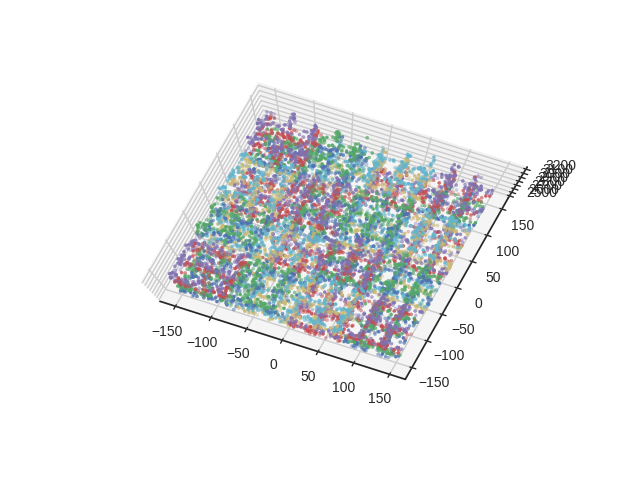

In [7]:
plt.figure()
ax = plt.axes(projection='3d')

for i in range(0,4):
    for j in range(0,4):
        for k in range(0,4):
            key = "%02d%02d%02d" % (i,j,k)
            ax.scatter(ddivs_master[key][0],ddivs_master[key][1],ddivs_master[key][2],s=20,marker='.')

In [ ]:
print(len(ddivs[0]))
print(np.array(ddivs[0]).transpose())

<IPython.core.display.Javascript object>


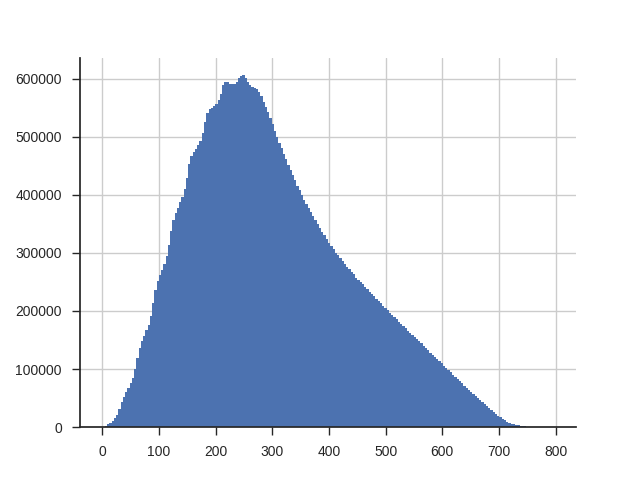

49995000


In [18]:
### DD ###

dd=[]

for idiv in range(0,len(ddivs)-1):
    
    subdiv = np.array(ddivs[idiv]).transpose()
    
    for jdiv in range(idiv+1,64):
    
        subdiv2 = np.array(ddivs[jdiv]).transpose()
        
        for j in range(0,len(subdiv)):
        
            pos1=subdiv[j]
            pos2=subdiv2[:].transpose()
            dist=distance(pos1,pos2)
            dd += dist.tolist()
            
for idiv in range(0,len(ddivs)):
    
    subdiv = np.array(ddivs[idiv]).transpose()
    
    for i in range(0,len(subdiv)-1):
        pos1=subdiv[i]
        pos2=np.array(subdiv[i+1:]).transpose()
        dist=distance(pos1,pos2)
        dd+=dist.tolist()

plt.figure()
hist_dd=plt.hist(dd,bins=200)
sn.despine()
print(len(dd))

Done! (DR) Took 14.57 seconds
1.00e+08 datapoints.


<IPython.core.display.Javascript object>


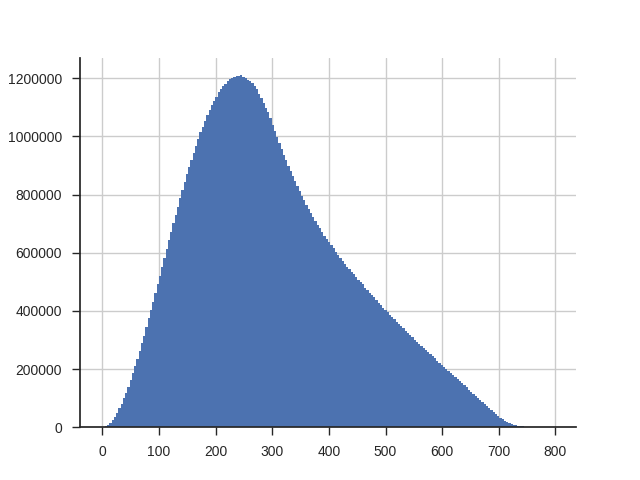

100000000


In [19]:
### DR ###

dr=[]

start = time.time()

for idiv in range(0,64):
    
    subdiv1 = np.array(ddivs[idiv]).transpose()
    
    for jdiv in range(0,64):
        
        #print(idiv+1,jdiv+1) #debug
    
        subdiv2 = np.array(rdivs[jdiv]).transpose()
        
        for j in range(0,len(subdiv1)):
        
            pos1=subdiv1[j]
            pos2=subdiv2.transpose()
            dist=distance(pos1,pos2)
            dr += dist.tolist()
            
end = time.time()

print("Done! (DR) Took %.2f seconds"%(end-start))
print("%.2e datapoints."%(len(dr)))

plt.figure()
hist_dr=plt.hist(dr,bins=200)
sn.despine()
print(len(dr))

<IPython.core.display.Javascript object>


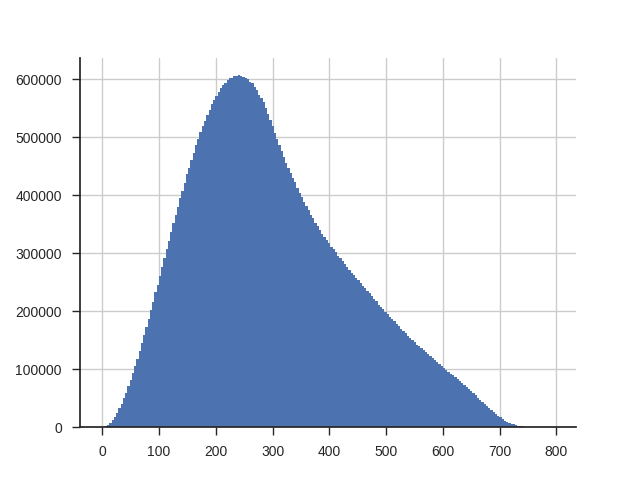

49995000


In [20]:
### RR ###

rr=[]

for idiv in range(0,len(rdivs)-1):
    
    subdiv = np.array(rdivs[idiv]).transpose()
    
    for jdiv in range(idiv+1,64):
    
        subdiv2 = np.array(rdivs[jdiv]).transpose()
        
        for j in range(0,len(subdiv)):
        
            pos1=subdiv[j]
            pos2=subdiv2[:].transpose()
            dist=distance(pos1,pos2)
            rr += dist.tolist()
            
for idiv in range(0,len(rdivs)):
    
    subdiv = np.array(rdivs[idiv]).transpose()
    
    for i in range(0,len(subdiv)-1):
        pos1=subdiv[i]
        pos2=np.array(subdiv[i+1:]).transpose()
        dist=distance(pos1,pos2)
        rr+=dist.tolist()

plt.figure()
hist_rr=plt.hist(rr,bins=200)
sn.despine()
print(len(rr))

<IPython.core.display.Javascript object>


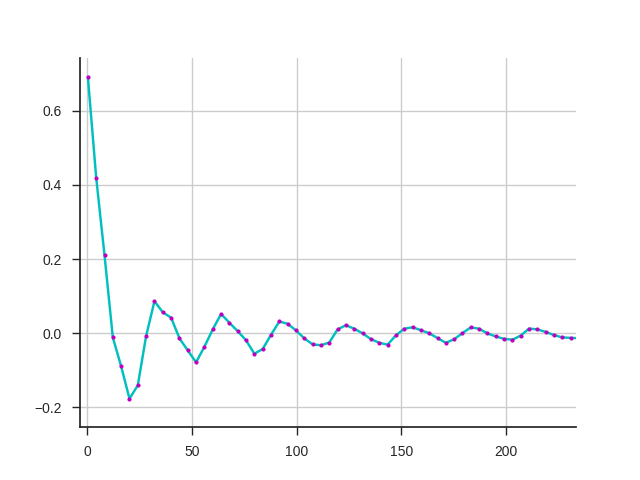

In [33]:
norm = (((1e4)**2)-1e4)/2.0
dr_norm = (1e4)**2

zeta = (hist_dd[0]/norm - 2*hist_dr[0]/dr_norm + hist_rr[0]/norm)/(hist_rr[0]/norm)

plt.figure()
plt.plot(hist_dd[1][0:-1],zeta,'c-')
plt.plot(hist_dd[1][0:-1],zeta,'mo',markersize=3)
sn.despine()

In [97]:
points=[]

for i in range(0,4):
    for j in range(0,4):
        for k in range(0,4):
            #points.append([i,j,k])
            ijk=[i,j,k]
            points.append(ijk)
            
pt = np.array(points).transpose()

<IPython.core.display.Javascript object>


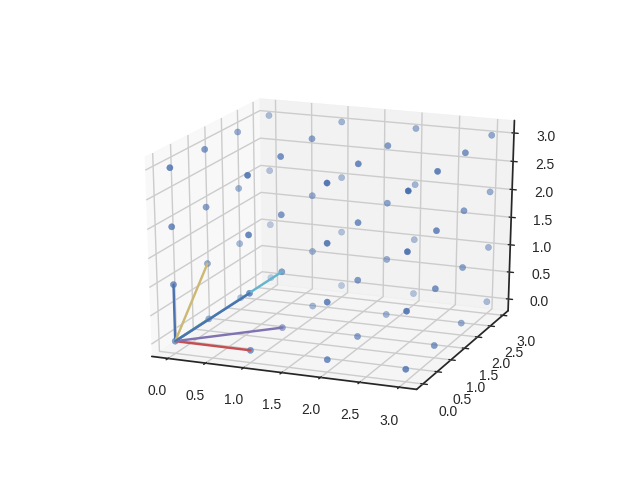

In [115]:
plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(pt[0],pt[1],pt[2])

n=0
u=n+1

ax.plot([n,n,n],[n,n,n],[n,n,u])
ax.plot([n,n,n],[n,n,u],[n,n,n])
ax.plot([n,n,u],[n,n,n],[n,n,n])
ax.plot([n,n,u],[n,n,u],[n,n,n])
ax.plot([n,n,n],[n,n,u],[n,n,u])
ax.plot([n,n,u],[n,n,u],[n,n,u])
ax.plot([n,n,u],[n,n,n],[n,n,u])